### Contents
A Model Without an Activation Function<br>
&emsp;Linear Example<br>
&emsp;Quadratic Example<br>


In [25]:
from typing import List

import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch import Tensor


Create a function for Plotting X, y, and predictions.

In [26]:
def plot_data(x: np.ndarray, y1: np.ndarray, y2: np.ndarray=None) -> None:
    ax = plt.subplots()[1]
    ax.set_xlim(x.min()-5, x.max()+5)
    ax.set_ylim(y1.min()-5, y1.max()+5)
    plt.scatter(x, y1, color='blue')
    if not y2 is None:
        ax.scatter(x, y2, color='red')
    plt.grid(True)
    plt.axhline(color='black')
    plt.axvline(color='black')

Create a Training Function

In [27]:

# When you have a large number of iterations over a small training set you are basically
# memorizing your training set.

EPOCHS = 500
LR = 0.01

def train_model(model: nn.Module, X_train, y_train) -> tuple[nn.Module, List]:
    torch.manual_seed(42)
    losses = []
    loss_function = nn.MSELoss()
    optimizer = optim.SGD(model.parameters(), lr=LR)

    for epoch in range(EPOCHS):
        total_loss = 0
        for X, y in zip(X_train, y_train):

            # Wrap in tensors
            X_tensor = torch.from_numpy(X)
            y_tensor = torch.from_numpy(y)
            
            # Pytorch accumulates gradients so before passing in a new
            # context (features) you need to zero out the gradients from the 
            # previous context.
            model.zero_grad()
            optimizer.zero_grad()

            # Forward pass - this will get log probabilities for every word 
            # in our vocabulary which is now represented as embeddings.
            prediction = model(X_tensor)

            # Compute the loss.
            # target has to be a list for some reason.
            loss = loss_function(prediction, y_tensor)

            # Backward pass to update the gradients.
            loss.backward()

            # Optimize the parameters
            optimizer.step()

            # Get the loss for this context.
            total_loss += loss.item()
            
        # Save the total loss for this epoch.
        losses.append(total_loss)

    return model, losses

Create a function for printing training results

In [28]:
def print_results(model: nn.Module, losses: list) -> None:
    # Print the losses of every 10th epoch.
    for epoch in range(0, EPOCHS, 10):
        print(epoch, ':', losses[epoch])
    # This will print the very last epoch so we can see the
    # final loss value.
    print(EPOCHS-1, ':', losses[EPOCHS-1])

    for name, parameter in model.named_parameters():
        print(name, parameter.data)

Create Quadratic Data

In [29]:
def create_quadratic_data(a:float, b: float, c:float) -> tuple[List[float], List[float]]:
    X = [float(x*.1) for x in range(-10, 11)]
    y = [a*(x**2)+(b*x)+c for x in X]
    X, y = np.array(X, dtype=np.float32), np.array(y, np.float32)
    X = np.reshape(X, (len(X), 1))
    y = np.reshape(y, (len(y), 1))
    return X, y

X_train, y_train = create_quadratic_data(5, 2, 3)

print('X_train Dimenstions:',X_train.ndim)
print('X_train Shape:', X_train.shape)
print(X_train[:2])

print('y_train Dimenstions:',y_train.ndim)
print('y_train Shape:', y_train.shape)
print(y_train[:2])

X_train Dimenstions: 2
X_train Shape: (21, 1)
[[-1. ]
 [-0.9]]
y_train Dimenstions: 2
y_train Shape: (21, 1)
[[6.  ]
 [5.25]]


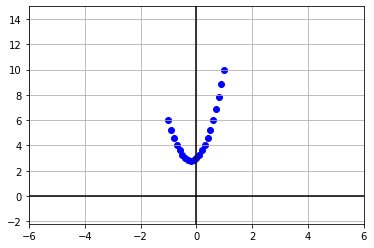

In [30]:
plot_data(X_train, y_train)

Design a model that can learn quadratic relationships

In [31]:
class QuadraticRegressionModel(nn.Module):

    def __init__(self):
        super(QuadraticRegressionModel, self).__init__()

        self.linear1 = nn.Linear(1, 20, bias=True)
        self.linear2 = nn.Linear(20, 20, bias=True)
        self.linear3 = nn.Linear(20, 1, bias=True)
        self.prelu = nn.PReLU(1, 0.25)

    def forward(self, x, log=False):
        #x = F.dropout(self.prelu(self.linear1(x)), p=0.5)
        #x = F.relu(self.linear2(x))
        #x = self.linear3(x)
        
        out = self.linear1(x)
        #out = self.prelu(out)
        #out = F.dropout(out, p=0.5)
        out = self.linear2(out)
        #out = F.relu(out)
        out = self.linear3(out)
        return out

Test the Untrained Model with a Single Prediction

In [32]:
#model = QuadraticRegressionModel()
#X = torch.tensor([1], dtype=torch.float32)
#prediction = model(X, log=True)
#print(X)
#print(prediction)

Train the Model

In [33]:
model = QuadraticRegressionModel()
model, losses = train_model(model, X_train, y_train)

# The loss should decrease with every iteration (epoch) over the training data.
print_results(model, losses)

0 : 81.06487090140581
10 : 10.677955786784878
20 : 5.085084210428477
30 : 4.139170162728988
40 : 2.833682532684179
50 : 2.395523050015072
60 : 2.043854186421413
70 : 1.897320269363263
80 : 1.7765952847039443
90 : 1.6708694753833697
100 : 1.580594192710123
110 : 1.5021702151952923
120 : 1.418687042194506
130 : 1.3021037682592578
140 : 1.1489599281558185
150 : 1.0222436538615511
160 : 0.9228035150008509
170 : 0.8508869721699739
180 : 0.7950351047693403
190 : 0.7491365688365477
200 : 0.6956964008941213
210 : 0.6496448856059942
220 : 0.6174653840243991
230 : 0.5925699727486062
240 : 0.5750461091702164
250 : 0.5615402006815202
260 : 0.5499815115956608
270 : 0.5396036015399659
280 : 0.5239953984018939
290 : 0.5091074464444318
300 : 0.5032351270765503
310 : 0.4851528045910527
320 : 0.4793147223172127
330 : 0.4686699125159066
340 : 0.4514148833478089
350 : 0.4172722119985792
360 : 0.3964158902745112
370 : 0.35829729479155503
380 : 0.3389348500795677
390 : 0.34219580230274005
400 : 0.3302428321

Plot labels and predictions

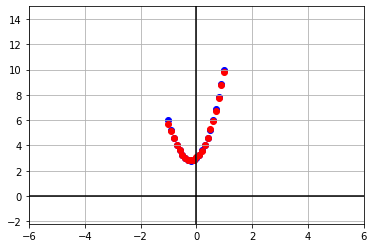

In [34]:
#model.eval() # Tell the model we are evaluating it so that it does not learn or dropout.
predictions = [model(torch.from_numpy(X)).detach().item() for X in X_train]

plot_data(np.array(X_train), np.array(y_train), np.array(predictions))

Print labels and predictions

In [35]:
print(y_train)
print(predictions)

[[ 6.  ]
 [ 5.25]
 [ 4.6 ]
 [ 4.05]
 [ 3.6 ]
 [ 3.25]
 [ 3.  ]
 [ 2.85]
 [ 2.8 ]
 [ 2.85]
 [ 3.  ]
 [ 3.25]
 [ 3.6 ]
 [ 4.05]
 [ 4.6 ]
 [ 5.25]
 [ 6.  ]
 [ 6.85]
 [ 7.8 ]
 [ 8.85]
 [10.  ]]
[5.660322189331055, 5.128299713134766, 4.596277713775635, 4.064255237579346, 3.6077451705932617, 3.2777462005615234, 3.017118453979492, 2.816610813140869, 2.8104872703552246, 2.884998321533203, 3.062192916870117, 3.2484545707702637, 3.563331127166748, 4.016719818115234, 4.60990571975708, 5.28105354309082, 5.9522013664245605, 6.696944713592529, 7.72796106338501, 8.759110450744629, 9.790261268615723]


In [36]:
threshold = 1
threshold_value = 20

in_features = 10
n_classes = 10
cutoffs = [1, 5, 9] # Each value must be between 1 and n_classes-1.

activation_functions = {
    'ELU': nn.ELU(),
    'Hardshrink': nn.Hardshrink(),
    'Hardsigmoin': nn.Hardsigmoid(),
    'Hardswish': nn.Hardswish(),
    'Hardtanh': nn.Hardtanh(),
    'LeadkyReLU': nn.LeakyReLU(),
    'LogSigmoid': nn.LogSigmoid(),
    #'MultiheadAttention': nn.MultiheadAttention(embed_dim, num_heads),
    'PReLU': nn.PReLU(),
    'ReLU': nn.ReLU(),
    'ReLU6': nn.ReLU6(),
    'RReLU': nn.RReLU(),
    'SELU': nn.SELU(),
    'CELU': nn.CELU(),
    'GELU': nn.GELU(),
    'Sigmoid': nn.Sigmoid(),
    'SiLU': nn.SiLU(),
    'Mish': nn.Mish(),
    'Softplus': nn.Softplus(),
    'Softshrink': nn.Softshrink(),
    'Softsign': nn.Softsign(),
    'Tanh': nn.Tanh(),
    'Tanhshrink': nn.Tanhshrink(),
    'Threshold': nn.Threshold(threshold, threshold_value),
    'GLU': nn.GLU(),
    'Softmin': nn.Softmin(),
    'Softmax': nn.Softmax(),
    'Softmax2d': nn.Softmax2d(),
    'LogSoftmax': nn.LogSoftmax(),
    'AdaptiveLogSoftmaxWithLoss': nn.AdaptiveLogSoftmaxWithLoss(in_features, n_classes, cutoffs)
}